In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
bias = 100
X, y,coef = make_regression(n_features = 1,noise = 10,random_state = 42,bias = bias,coef = True
                           )

In [3]:
X.shape,y.shape

((100, 1), (100,))

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
coef

array(41.74110031)

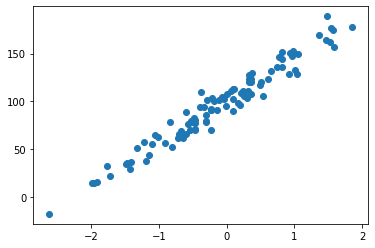

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([44.43716999])

In [11]:
model.intercept_

101.16511532052698

In [12]:
y_pred  = model.predict(X)

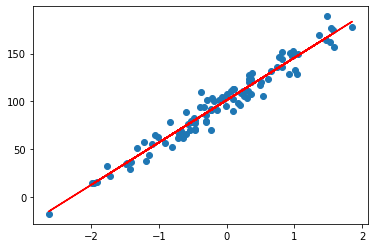

In [13]:
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")

In [14]:
from sklearn import metrics

In [15]:
print("MAE",metrics.mean_absolute_error(y,y_pred))
print("MSE",metrics.mean_squared_error(y,y_pred))
print("RMSE",np.mean(metrics.mean_squared_error(y,y_pred)))

MAE 7.104493131413916
MSE 78.05425042123902
RMSE 78.05425042123902


In [16]:
class CustomLinearReg:
    
    def __init__(self, lr=.1, max_iters=20):
        
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(self.max_iters):
            err = self.gradient_decend(X, y)
            errors.append(err)
            
        return errors
            
    def gradient_decend(self, X, y):
        delta_coef, delta_inter, err = self.gradient(X, y)
        
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        return err
    
    def gradient(self, X, y):
        
        ya = y.reshape(-1, 1)
        yh = self.hypo(X)
        
        diff = (yh-ya)
        
        de2m = np.mean(diff * X)
        de2c = np.mean(diff)
        
        return -de2m*self.lr, -de2c*self.lr, np.mean(diff**2)
        
    def hypo(self, X):
        return self.coef_ * X + self.intercept_

In [17]:
model = CustomLinearReg()

In [18]:
errors = model.fit(X,y)

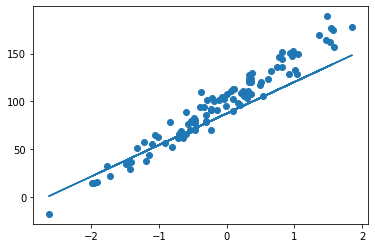

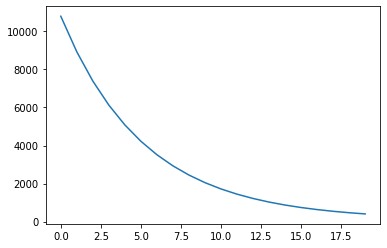

In [19]:
yp = model.hypo(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, yp)
plt.show()

plt.figure()
plt.plot(errors)
plt.show()

In [20]:
errors

[10799.604217368229,
 8928.076163482941,
 7389.694491317361,
 6124.056364242,
 5081.8944327295385,
 4222.993808012458,
 3514.503556450573,
 2929.567219577435,
 2446.211432934232,
 2046.4434548670679,
 1715.5178771521234,
 1441.3404169333935,
 1213.9828412590023,
 1025.2880387895564,
 868.5482591292778,
 738.2427746351328,
 629.8238321242173,
 539.5418730723318,
 464.30270765599084,
 401.55070844047833]